# Part I: Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pip install kaggle

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


## Option 1: use command line (must include json parser in order for line to work

Go to account and create a API token, there a kaggle.json file will download, make sure to upload it here and then create the directory

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poojagarlapati","key":"6826134e05ab2aedf26841765b13d6a5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


## Option 2: download dataset as zip from kaggle, run line below

In [ ]:
from google.colab import files
files.upload()

{}

If you did second option, ignore the two lines below

In [ ]:
cd /content/drive/MyDrive/Lactic_Pooja_Kaggle/

/content/drive/MyDrive/Lactic_Pooja_Kaggle


In [ ]:
!kaggle competitions download -c bttai-ajl-2025

 98% 301M/306M [00:13<00:00, 12.1MB/s]
100% 306M/306M [00:13<00:00, 23.9MB/s]


### Read!!

before unzipping, optionally put the zip file in a folder within your folder repo (helps with organization), line below shows content

In [ ]:
!unzip -l bttai-ajl-2025.zip

unzip:  cannot find or open bttai-ajl-2025.zip, bttai-ajl-2025.zip.zip or bttai-ajl-2025.zip.ZIP.


In [ ]:
cd /content/drive/MyDrive/Break Through Tech/Data

/content/drive/MyDrive/Break Through Tech/Data


In [ ]:
!unzip -q -o bttai-ajl-2025.zip

# Part II: Viewing Dataset

- just for fun hehe, optional to run lines below

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import torch
import numpy as np
import pandas as pd
!apt-get install tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, ReLU, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!tree -d /content/drive/MyDrive/Break_Through_Tech/Data   #excludes the .csv files you see in line

/content/drive/MyDrive/Break_Through_Tech/Data
├── test
│   └── test
└── train
    └── train
        ├── acne
        ├── acne-vulgaris
        ├── actinic-keratosis
        ├── basal-cell-carcinoma
        ├── basal-cell-carcinoma-morpheiform
        ├── dermatofibroma
        ├── dermatomyositis
        ├── dyshidrotic-eczema
        ├── eczema
        ├── epidermal-nevus
        ├── folliculitis
        ├── kaposi-sarcoma
        ├── keloid
        ├── malignant-melanoma
        ├── melanoma
        ├── mycosis-fungoides
        ├── prurigo-nodularis
        ├── pyogenic-granuloma
        ├── seborrheic-keratosis
        ├── squamous-cell-carcinoma
        └── superficial-spreading-melanoma-ssm

25 directories


### Looking at training dataset

In [ ]:
cd /content/drive/MyDrive/Break_Through_Tech/Data

/content/drive/MyDrive/Break_Through_Tech/Data


In [ ]:
df_train = pd.read_csv("train.csv")
df_train.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,ddi_scale
0,fd06d13de341cc75ad679916c5d7e6a6,4,4,prurigo-nodularis,benign-epidermal,benign,NaN,34
1,a4bb4e5206c4e89a303f470576fc5253,1,1,basal-cell-carcinoma-morpheiform,malignant-epidermal,malignant,NaN,12
2,c94ce27e389f96bda998e7c3fa5c4a2e,5,5,keloid,inflammatory,non-neoplastic,1 Diagnostic,56
3,ebcf2b50dd943c700d4e2b586fcd4425,3,3,basal-cell-carcinoma,malignant-epidermal,malignant,NaN,34
4,c77d6c895f05fea73a8f3704307036c0,1,1,prurigo-nodularis,benign-epidermal,benign,NaN,12


In [ ]:
df_train['fitzpatrick_scale'].nunique()

7

In [ ]:
print(df_train.shape)
df_train.nunique()

(2860, 8)


,0
md5hash,2860
fitzpatrick_scale,7
fitzpatrick_centaur,7
label,21
nine_partition_label,7
three_partition_label,3
qc,5
ddi_scale,4


In [ ]:
df_train.describe()

,fitzpatrick_scale,fitzpatrick_centaur,ddi_scale
count,2860.000000,2860.000000,2860.000000
mean,2.524476,2.095455,23.547552
std,1.474428,1.510942,15.530522
min,-1.000000,-1.000000,-1.000000
25%,2.000000,1.000000,12.000000
50%,2.000000,2.000000,12.000000
75%,3.000000,3.000000,34.000000
max,6.000000,6.000000,56.000000


In [ ]:
df_test = pd.read_csv("test.csv")
df_test.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,qc,ddi_scale
0,0844ae634f0e6e7ef1f73c2aeecbae0e,2,2,NaN,12
1,3b290d262098f761d719aa07cf36c040,4,3,NaN,34
2,cf561d08ac46d0fda678bff6621005ee,2,3,NaN,12
3,e6371069be05c6b0a95b4b3f1bacc9a5,4,3,NaN,34
4,f76cddb37265f97508f159078dcc7e7c,5,5,NaN,56


In [ ]:
print(df_test.shape)
df_test.nunique()

(1227, 5)


,0
md5hash,1227
fitzpatrick_scale,7
fitzpatrick_centaur,7
qc,4
ddi_scale,4


In [ ]:
!cd train/train/acne/

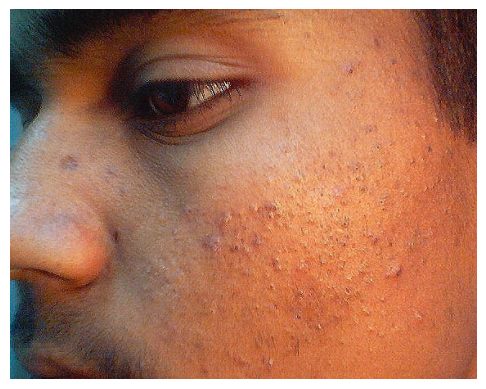

In [ ]:
def show_image(choice,folder, name):
    choice = 'train/train' if 1 else 'test/test'
    image_path = f'{choice}/{folder}/{name}'
    image = Image.open(image_path)
    plt.axis('off')
    plt.imshow(image)

show_image(1,'acne', '081208f0376bad67bceda18f1ff746a5.jpg')


In [ ]:
# Add .jpg extension to md5hash column to reference the file_name
df_train['md5hash'] = df_train['md5hash'].astype(str) + '.jpg'
df_test['md5hash'] = df_test['md5hash'].astype(str) + '.jpg'

# Combine label and md5hash to form the correct path
df_train['file_path'] = df_train['label'] + '/' + df_train['md5hash']
df_train.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,ddi_scale,file_path
0,fd06d13de341cc75ad679916c5d7e6a6.jpg,4,4,prurigo-nodularis,benign-epidermal,benign,NaN,34,prurigo-nodularis/fd06d13de341cc75ad679916c5d7...
1,a4bb4e5206c4e89a303f470576fc5253.jpg,1,1,basal-cell-carcinoma-morpheiform,malignant-epidermal,malignant,NaN,12,basal-cell-carcinoma-morpheiform/a4bb4e5206c4e...
2,c94ce27e389f96bda998e7c3fa5c4a2e.jpg,5,5,keloid,inflammatory,non-neoplastic,1 Diagnostic,56,keloid/c94ce27e389f96bda998e7c3fa5c4a2e.jpg
3,ebcf2b50dd943c700d4e2b586fcd4425.jpg,3,3,basal-cell-carcinoma,malignant-epidermal,malignant,NaN,34,basal-cell-carcinoma/ebcf2b50dd943c700d4e2b586...
4,c77d6c895f05fea73a8f3704307036c0.jpg,1,1,prurigo-nodularis,benign-epidermal,benign,NaN,12,prurigo-nodularis/c77d6c895f05fea73a8f37043070...


In [ ]:
# Ensure model fairness by evenly representing each skin type
# Display number of entries for each skin type in 'train.csv'
df_train['fitzpatrick_scale'].value_counts()

,count
fitzpatrick_scale,
2,964
3,562
1,528
4,393
5,216
-1,108
6,89


In [ ]:
# Display number of entries for each skin type in 'test.csv'
df_test['fitzpatrick_scale'].value_counts()

,count
fitzpatrick_scale,
2,397
3,243
1,238
4,186
5,83
6,44
-1,36


In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
df_train['encoded_label'] = label_encoder.fit_transform(df_train['label'])

# Split the data into training and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the directory paths
train_dir = '/content/drive/MyDrive/Break_Through_Tech/Data/train/train/'

In [ ]:
def create_generator(dataframe, directory, batch_size=32, target_size=(128, 128)):
    """
    Template function to create image generators.
    Students should complete this function to load images and labels properly.
    """
    generator = train_datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory=directory,
        x_col='file_path',  # Column containing the file paths of the images
        y_col='encoded_label',  # Column containing the labels (encoded or raw)
        target_size=target_size,  # Resizing the images
        batch_size=batch_size,
        class_mode='raw',  # For regression or raw labels
        validate_filenames=True,  # Disable strict filename validation
    )
    return generator

# Create generators
train_generator = create_generator(train_data, train_dir)
val_generator = create_generator(val_data, train_dir)

Found 2288 validated image filenames.
Found 572 validated image filenames.


In [ ]:
# Build a convolutional neural network (CNN)
cnn_model = Sequential()

# 2. Create input layer and add it to the model object
input_layer = InputLayer(input_shape=(128, 128, 3))
cnn_model.add(input_layer)

# 3. Create first convolutional layer and add it to the model object
conv_1= Conv2D(16, 3)
batchNorm_1 = BatchNormalization()
relu_1 = ReLU()
cnn_model.add(conv_1)
cnn_model.add(batchNorm_1)
cnn_model.add(relu_1)

# Create second convolutional layer and add it to the model object
conv_2= Conv2D(32, 3)
batchNorm_2 = BatchNormalization()
relu_2 = ReLU()
cnn_model.add(conv_2)
cnn_model.add(batchNorm_2)
cnn_model.add(relu_2)

# Create third convolutional layer and add it to the model object
conv_3= Conv2D(64, 3)
batchNorm_3 = BatchNormalization()
relu_3 = ReLU()
cnn_model.add(conv_3)
cnn_model.add(batchNorm_3)
cnn_model.add(relu_3)

# Create fourth convolutional layer add it to the model object
conv_4= Conv2D(128, 3)
batchNorm_4 = BatchNormalization()
relu_4 = ReLU()
cnn_model.add(conv_4)
cnn_model.add(batchNorm_4)
cnn_model.add(relu_4)

# Create max pooling layer and add it to the model object
pooling_layer = MaxPooling2D()
cnn_model.add(pooling_layer)

# Create flattening layer and add it to the model object
flatten_layer = Flatten()
cnn_model.add(flatten_layer)

# Create output layer and add it to the model object
output_layer = Dense(units=21)
cnn_model.add(output_layer)

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 126, 126, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 124, 124, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 124, 124, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 120, 120, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 120, 120, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 460800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 21)                  │       9,676,821 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,775,221 (37.29 MB)

 Trainable params: 9,774,741 (37.29 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
# Compile the model
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [ ]:
# Fit the model to the training data
num_epochs = 1
history = cnn_model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = num_epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 811s 11s/step - loss: 12.0991 - sparse_categorical_accuracy: 0.0722 - val_loss: 12.0096 - val_sparse_categorical_accuracy: 0.0699


In [ ]:
# Create ImageDataGenerator instance for test data
test_datagen = ImageDataGenerator(rescale=1./255)

def create_test_generator(dataframe, directory, batch_size=32, target_size=(128, 128)):
    generator = test_datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory=directory,
        x_col='md5hash',  # Column containing the file names of the images
        y_col=None,  # Column containing the labels (encoded or raw)
        target_size=target_size,  # Resizing the images
        batch_size=batch_size,
        class_mode=None,  # For regression or raw labels
        validate_filenames=True,  # Disable strict filename validation
        )

    return generator

test_generator = create_test_generator(df_test, '/content/drive/MyDrive/Break_Through_Tech/Data/test/test/')

Found 1227 validated image filenames.


In [ ]:
# Map skin conditions to index numbers
conditions = [
    'acne', 'acne-vulgaris', 'actinic-keratosis', 'basal-cell-carcinoma',
    'basal-cell-carcinoma-morpheiform', 'dermatofibroma', 'dermatomyositis',
    'dyshidrotic-eczema', 'eczema', 'epidermal-nevus', 'folliculitis',
    'kaposi_sarcoma', 'keloid', 'malignant-melanoma', 'melanoma', 'mycosis-fungoides',
    'prurigo-nodularis', 'pyogenic-granuloma', 'sebhorreic-keratosis',
    'squamous-cell-carcinoma', 'superficial-spreading-melanoma-ssm'
]

class_indices = {condition: idx for idx, condition in enumerate(conditions)}

# Prediction process
predictions = cnn_model.predict(test_generator, verbose=1)

# If the number of predictions is less than the number of filenames (in case of batching issues)
# You might need to add a condition to make sure the number of predictions is the same.
if predictions.ndim > 1:
    predicted_class_indices = predictions.argmax(axis=1)
else:
    predicted_class_indices = predictions.round().astype(int)

# Check lengths
print(f"Number of filenames: {len(test_generator.filenames)}")
print(f"Number of predictions: {len(predicted_class_indices)}")

# If lengths still mismatch, you can pad or truncate the predictions or filenames as necessary
if len(predicted_class_indices) != len(test_generator.filenames):
    # Handle the mismatch by trimming or padding the predictions
    predicted_class_indices = predicted_class_indices[:len(test_generator.filenames)]

# Reverse the mapping to get class names
class_labels = {v: k for k, v in class_indices.items()}
predicted_class_names = [class_labels[idx] for idx in predicted_class_indices]

# Now create the DataFrame
output_df = pd.DataFrame({
    'md5hash': test_generator.filenames[:len(predicted_class_names)],
    'label': predicted_class_names
})

# Remove the '.jpg' extension from each entry in 'md5hash'
output_df['md5hash'] = output_df['md5hash'].str.replace('.jpg', '', regex=False)

# Save the updated DataFrame to a CSV file
output_df.to_csv('submission.csv', index=False)
print('Created submission.csv with updated MD5 hashes!')


39/39 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step
Number of filenames: 1227
Number of predictions: 1227
Created submission.csv with updated MD5 hashes!
